<a href="https://colab.research.google.com/github/MerkulovDaniil/AALS-for-CP/blob/master/intro_opt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples

## Wolfe’s example

In [84]:
import jax.numpy as jnp
from jax import grad

def f(x):
    x1, x2 = x
    ans = (x1 > jnp.abs(x2))*5*jnp.sqrt(9*x1**2 + 16**x2**2) + (x1 <= jnp.abs(x2))*(9*x1 + 16*jnp.abs(x2))
    if ans.any() > 50:
        print(f"x1 {x1}, x2 {x2}, f {ans}")
    return ans

df = grad(f)

In [85]:
df([0.,0.])

[DeviceArray(9., dtype=float32), DeviceArray(16., dtype=float32)]

In [86]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import pyplot as plt

def plot_3d_function(x1, x2, f, title, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1 = x1.max()
    up_lim_2 = x2.max()
    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2)) # evaluation of the function on the grid

    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)
    #===============
    # First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
    cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)


    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)
    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu, extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)

    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.show()


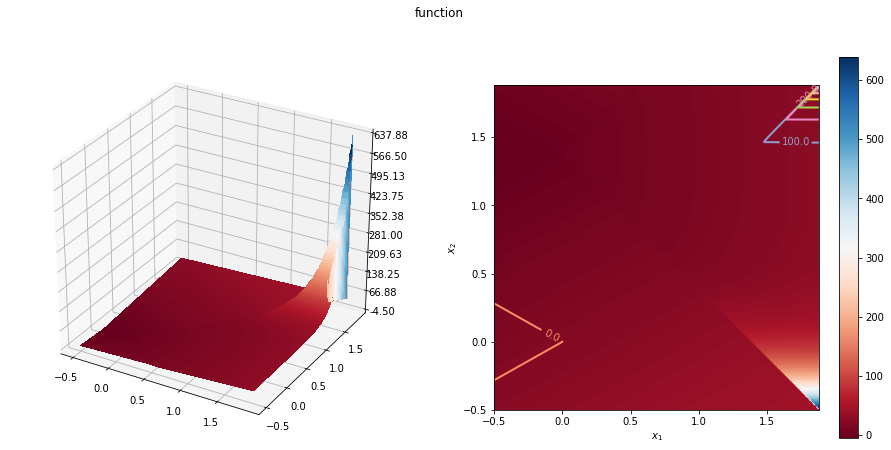

In [87]:
up_lim = 17/9
low_lim = -0.5
x1 = np.arange(low_lim, up_lim, 0.01)
x2 = np.arange(low_lim, up_lim, 0.01)
title = 'function'
plot_3d_function(x1, x2, f, title)

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

xlist = np.linspace(-1.0, 2.0, 100)
ylist = np.linspace(-0.5, 1.5, 100)
X1, X2 = np.meshgrid(xlist, ylist)

Z = Z = f((X1, X2))
plt.figure()

levels = np.linspace(-10, 70, 30)
contour = plt.contour(X, Y, Z, levels, colors='k')
# plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)

plt.title('Non - differentiable function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Exercises

## Task 1

Find projection on the $S$ set $\pi_S (y) = \pi$ if: 

$$
S = \{x \in \mathbb{R}^n \mid Ax = b, A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^{m}\}, y \notin S
$$

Hint: Check [fmin.xyz](https://fmin.xyz) 

<font color="lime"> ==YOUR ANSWER== </font>

For following problem:

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

* Write KKT conditions;
* Find $x^\ast$ - solution;

<font color="lime"> ==YOUR ANSWER== </font>

Implement projected gradient descent for following task.

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

Compare with analytical solution and `scipy.optimize`

In [ ]:
import numpy as np

In [ ]:
np.random.seed(1)

A = np.random.randn(100, 20)
b = np.random.randn(100)

P = np.random.randn(10, 20)
p = np.random.randn(10)

In [ ]:
def f(x):
    ### YOUR CODE
    return 

In [ ]:
def proj(P, p, x):
    ### YOUR CODE
    return 

In [ ]:
x = np.zeros(20)
### Projected gradient descent
...

Comparison with `scipy.optimize`

In [ ]:
### YOUR CODE

Comparison with analytical solution

In [ ]:
### YOUR CODE

## Task 2

Besides projected gradient descent, there is other constrainted optimization method - [Augmented Lagrangian method](https://www.him.uni-bonn.de/fileadmin/him/Section6_HIM_v1.pdf). Consider following optimization problem:
$$
\begin{split} & f(x) \to \min\limits_{x \in \mathbb{R}^{n} } \\  & Ax = b \end{split}
$$

Rather explicitly solving the problem, we will solve the following problem:

$$
L(x) = f(x) + \lambda^T (Ax-b) + \frac{\rho}{2} \|Ax - b\|^2
$$

After that we update $\lambda$ and solve new task again, until method doesn't converge

$$
x_{k}=\arg \min _{x \in \Omega} \mathcal{L}\left(x, \lambda_{k-1} ; \rho\right)
$$

$$
\lambda_{k}=\lambda_{k-1}+\rho\left(A x_{k}-b\right)
$$

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
np.random.seed(1)
Sigma = np.diag(np.ones(10))
Tmp = np.random.randn(10, 10)
S = Tmp @ Sigma @ Tmp.T
L = np.random.randn(10, 10)
A = L.T @ L
b = np.random.randn(10)

P = np.random.randn(10, 10)
p = np.random.randn(10)
rho = 5

Your task is minimize using Augmented Lagrangian method:
$$
\begin{split} & x^TAx + b^Tx \to \min\limits_{x \in \mathbb{R}^{n} } \\  & Px = p \end{split}
$$

In [ ]:
def f(x):
    ### YOUR CODE
    return 

In [ ]:
def L(x):
    ### YOUR CODE
    return 

Comparison with constrainted optimization

In [ ]:
### YOUR CODE